In [2]:
#import Thư viện
import pandas as pd #Đọc dữ liệu
import numpy as np #Xử lý dữ liệu
import matplotlib.pyplot as plt #Vẽ biểu đồ
%matplotlib inline

In [3]:
#Load Dataset
data = pd.read_csv("VCB-Historical-Data.csv")
data 

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
1,2017-12-04,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2,2017-12-05,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
3,2017-12-06,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
4,2017-12-07,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...,...
1324,2023-03-27,91000.0,89000.0,91000.0,88000.0,730.10K,2.25%
1325,2023-03-28,91800.0,90800.0,92900.0,90100.0,845.80K,0.88%
1326,2023-03-29,92300.0,92500.0,92500.0,90500.0,422.80K,0.54%
1327,2023-03-30,92700.0,92300.0,93200.0,92000.0,409.70K,0.43%


In [4]:
#kích thước dữ liệu
data.shape

(1329, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1329 non-null   object 
 1   Price     1329 non-null   float64
 2   Open      1329 non-null   float64
 3   High      1329 non-null   float64
 4   Low       1329 non-null   float64
 5   Vol.      1329 non-null   object 
 6   Change %  1329 non-null   object 
dtypes: float64(4), object(3)
memory usage: 72.8+ KB


In [6]:
#Xem dữ liệu 
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
1,2017-12-04,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2,2017-12-05,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
3,2017-12-06,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
4,2017-12-07,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
5,2017-12-08,35672.0,36089.0,36089.0,35255.0,1.94M,-1.16%
6,2017-12-11,33815.0,34876.0,35558.0,33815.0,1.85M,-5.21%
7,2017-12-12,33891.0,34345.0,34421.0,31540.0,3.11M,0.22%
8,2017-12-13,33360.0,34118.0,34194.0,33132.0,1.50M,-1.57%
9,2017-12-14,34345.0,33360.0,34497.0,33284.0,2.76M,2.95%


In [7]:
#Mô tả bộ dữ liệu
data.describe()

,Price,Open,High,Low
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,65269.889391,65219.899925,66053.979684,64404.004515
std,14795.531491,14812.138376,14952.640743,14616.374186
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51758.000000,51758.000000,52296.000000,51221.000000
50%,66579.000000,66500.000000,67424.000000,65800.000000
75%,76722.000000,76800.000000,77419.000000,75871.000000
max,96000.000000,95800.000000,96300.000000,94000.000000


In [8]:
#Định dạng lại cột Date từ obj -> datatime
data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace = True)

In [9]:
#Lấy dữ liệu
data['Date'] = pd.DataFrame(data['Date'])

#Chuyển cột Date là index để lập biểu đồ so sánh về sau
data.index = data.Date
data.drop('Date', axis = 1, inplace = True)

In [10]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-12-01,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
2017-12-04,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2017-12-05,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
2017-12-06,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
2017-12-07,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...
2023-03-27,91000.0,89000.0,91000.0,88000.0,730.10K,2.25%
2023-03-28,91800.0,90800.0,92900.0,90100.0,845.80K,0.88%
2023-03-29,92300.0,92500.0,92500.0,90500.0,422.80K,0.54%


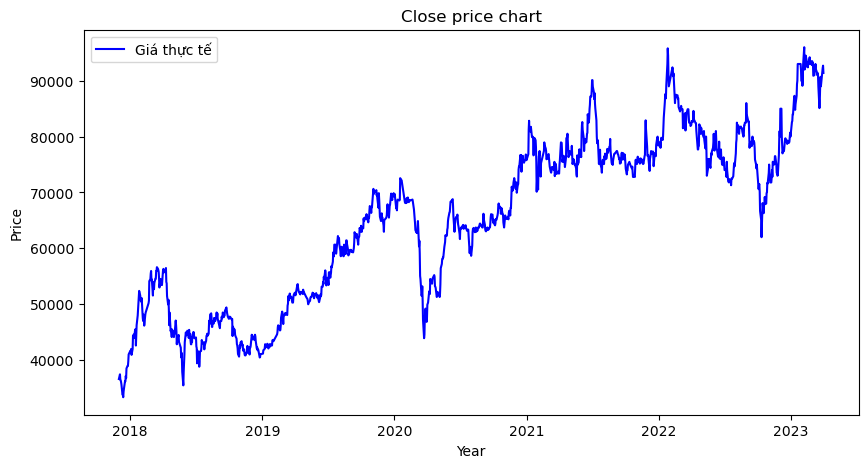

In [11]:
#lập biểu đồ giá đóng
plt.figure(figsize=(10,5))
plt.plot(data['Price'], label = 'Giá thực tế', color = 'blue')
plt.title('Close price chart')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
data = data.loc[:, ['Price']]
data

,Price
Date,
2017-12-01,36620.0
2017-12-04,37454.0
2017-12-05,36468.0
2017-12-06,36392.0
2017-12-07,36089.0
...,...
2023-03-27,91000.0
2023-03-28,91800.0
2023-03-29,92300.0


<Axes: xlabel='Date'>

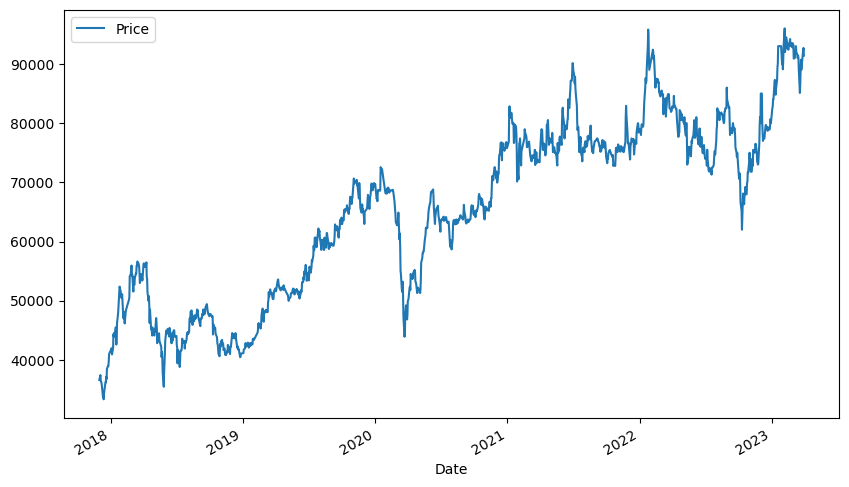

In [13]:
data.plot(figsize=(10,6))

In [14]:
#Kiểm tra các giá trị null
data.isna().sum()

Price    0
dtype: int64

In [15]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Price, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.6205124279126895
2. P-Value :  0.47246066170209156
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1328
5. Critical Values :
	 1% :  -3.435283723720563
	 5% :  -2.8637188486120326
	 10% :  -2.567930026514189


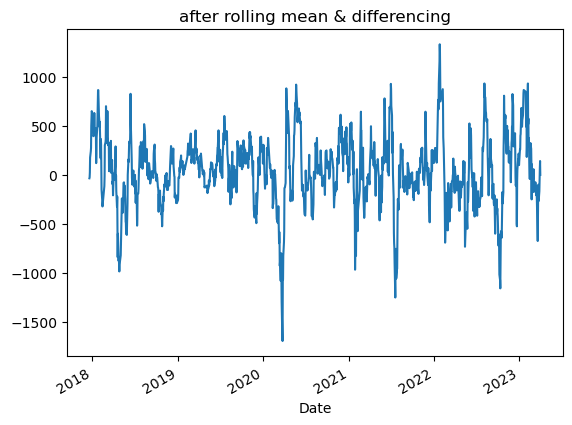

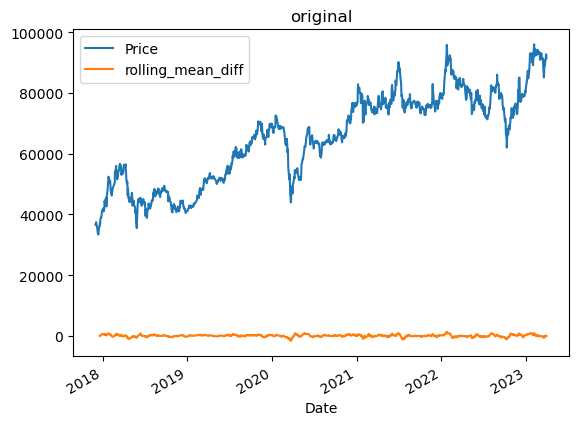

In [16]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [17]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -7.956747321012497
2. P-Value :  3.0230200542991798e-12
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1293
5. Critical Values :
	 1% :  -3.4354175403897727
	 5% :  -2.8637778952086848
	 10% :  -2.5679614713589562


In [18]:
import statsmodels.api as sm

In [19]:
model=sm.tsa.statespace.SARIMAX(data['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1329
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11315.386
Date:                            Fri, 05 May 2023   AIC                          22640.772
Time:                                    14:05:21   BIC                          22666.684
Sample:                                         0   HQIC                         22650.489
                                           - 1329                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.305      3.278      0.001       0.402       1.596
ma.L1         -0.9988      0.348     -2.869      0.004      -1.681      -0.317
ar.S.L12       0.1045      0.014      7.421      0.000       0.077       0.132
ma.S.L12      -0.9998      0.053    -19.024      0.000      -1.103      -0.897
sigma2      1.594e+06   2.07e-08    7.7e+13      0.000    1.59e+06    1.59e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               441.09
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+30. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

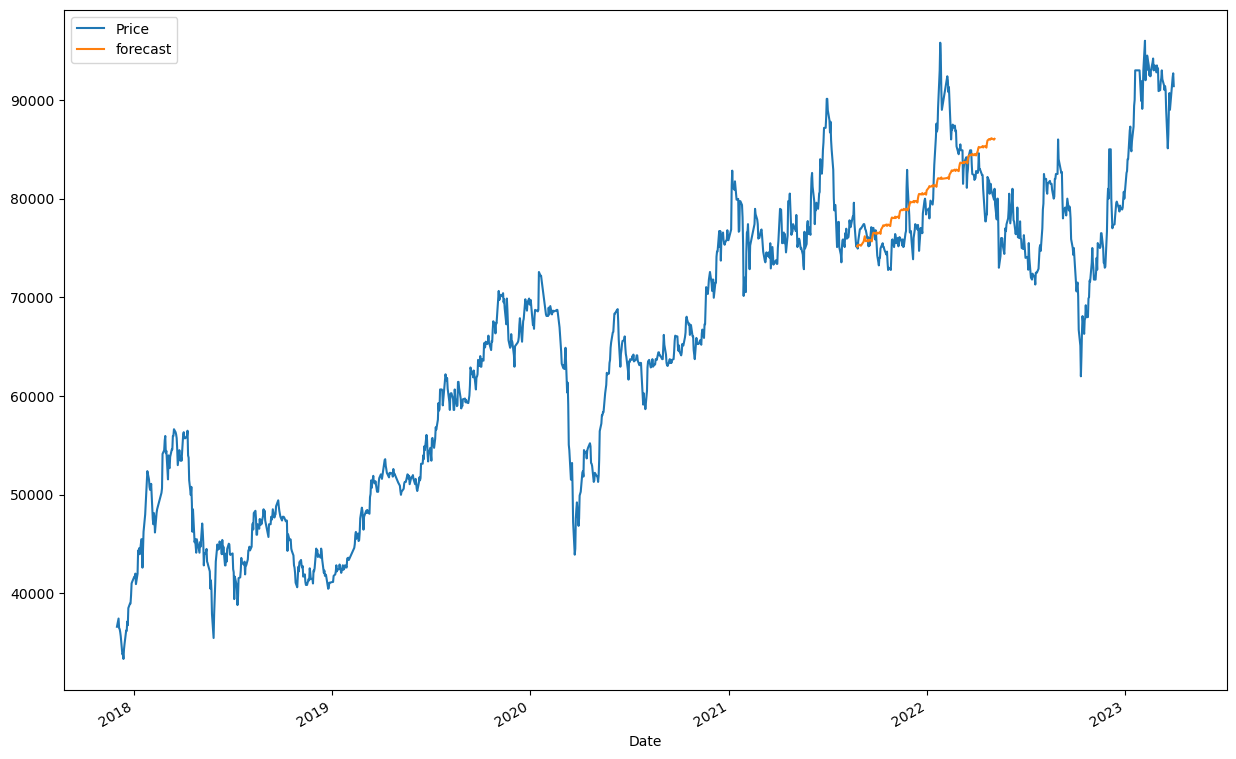

In [21]:
data['forecast']=results.predict(start=930,end=1100,dynamic=True)
data[['Price','forecast']].plot(figsize=(15,10))

In [22]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [23]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,Price,rolling_mean_diff,forecast
2023-04-30,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN
2023-07-31,NaN,NaN,NaN
2023-08-31,NaN,NaN,NaN
2023-09-30,NaN,NaN,NaN
2023-10-31,NaN,NaN,NaN
2023-11-30,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN
2024-01-31,NaN,NaN,NaN


In [24]:
data=pd.concat([data,pred_date])

<Axes: >

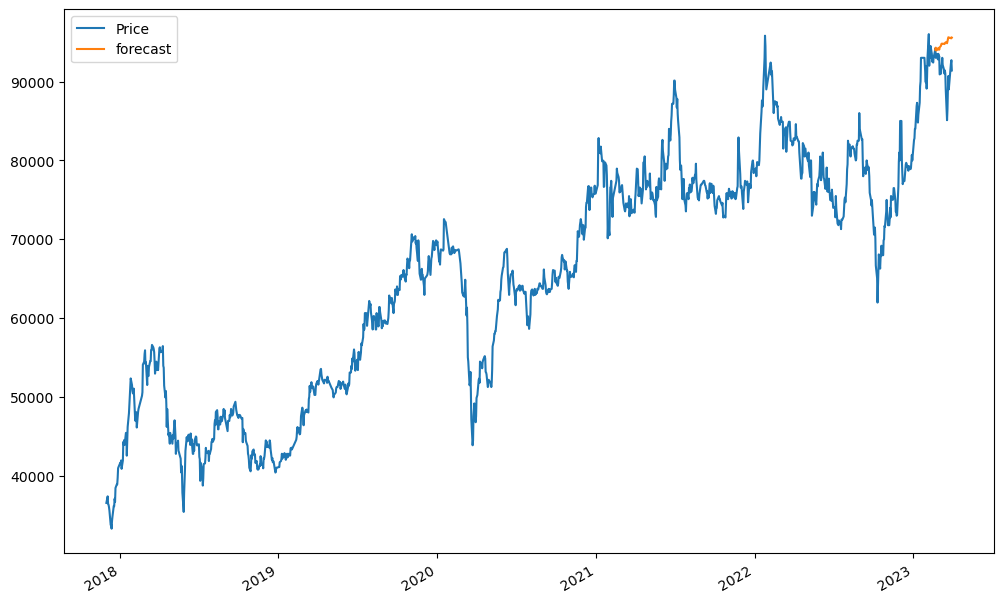

In [25]:
data['forecast'] = results.predict(start = 1300, end = 1328, dynamic= True)  
data[['Price', 'forecast']].plot(figsize=(12, 8))

In [26]:
pred_date

,Price,rolling_mean_diff,forecast
2023-04-30,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN
2023-07-31,NaN,NaN,NaN
2023-08-31,NaN,NaN,NaN
2023-09-30,NaN,NaN,NaN
2023-10-31,NaN,NaN,NaN
2023-11-30,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN
2024-01-31,NaN,NaN,NaN
